<a href="https://colab.research.google.com/github/fpgmina/DeepNLP/blob/main/HuggingFace_TimesFM_example_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HuggingFace: https://huggingface.co/google/timesfm-2.5-200m-pytorch

GitHub: https://github.com/google-research/timesfm

In [1]:
# 1. Install the timesfm library (Run this in a Colab cell)
!pip install git+https://github.com/google-research/timesfm.git

  Cloning https://github.com/google-research/timesfm.git to /tmp/pip-req-build-t3jsln18
  Running command git clone --filter=blob:none --quiet https://github.com/google-research/timesfm.git /tmp/pip-req-build-t3jsln18
  Resolved https://github.com/google-research/timesfm.git to commit 58e01ad82fec7f4e975d708409d51fd5c0131bbd
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 2.8 MB/s eta 0:00:00
  Created wheel for timesfm: filename=timesfm-2.0.0-py3-none-any.whl size=36623 sha256=2da4bd1766de76a7e30b263acd945bacf7804fef6602be26515c931947461bce
  Stored in directory: /tmp/pip-ephem-wheel-cache-b5fbqdeg/wheels/d0/38/4b/2726a715c889b3debae031f66677e568b6cac46fdc9f1c63eb
Successfully built timesfm


In [13]:
import numpy as np
import torch
import timesfm
import matplotlib.pyplot as plt

In [3]:
# 3. Load and Compile the Model (This may take a moment)
torch.set_float32_matmul_precision("high")
model = timesfm.TimesFM_2p5_200M_torch.from_pretrained("google/timesfm-2.5-200m-pytorch")

# Define model configuration (use the standard defaults for a quick start)
model.compile(
    timesfm.ForecastConfig(
        max_context=1024,
        max_horizon=256,
        normalize_inputs=True,
    )
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/475 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/925M [00:00<?, ?B/s]

In [4]:
# 4. Prepare Example Input Data
# Use a numpy array of historical time series values
# The model is univariate (one series at a time)
historical_data_1 = np.linspace(0, 10, 100)  # Example 1: 100 context points
historical_data_2 = np.sin(np.linspace(0, 20, 67)) # Example 2: 67 context points

# 5. Make a Forecast
horizon_steps = 12
point_forecast, quantile_forecast = model.forecast(
    horizon=horizon_steps,
    inputs=[historical_data_1, historical_data_2] # Pass your series as a list
)

# Output shapes:
# point_forecast.shape -> (2, 12)  # (Number of Series, Horizon)
# quantile_forecast.shape -> (2, 12, 10) # (Series, Horizon, Quantiles)

In [5]:
point_forecast

array([[10.127586  , 10.18839   , 10.272738  , 10.430081  , 10.479407  ,
        10.591321  , 10.746951  , 10.754816  , 10.890969  , 11.026997  ,
        11.1163225 , 11.225952  ],
       [ 0.98553497,  0.977988  ,  0.89091355,  0.7285633 ,  0.47109842,
         0.19757856, -0.1051051 , -0.3954248 , -0.63100696, -0.8359535 ,
        -0.96646327, -1.0037615 ]], dtype=float32)

## Example Usage with Sine Function

In [6]:
# --- 1. Generate the Full Sine Wave Data ---
# A common setup: 4 full cycles (e.g., 400 data points)
n_cycles = 4
n_points_per_cycle = 100
n_total = n_cycles * n_points_per_cycle

# Generate the true underlying sine series
t = np.linspace(0, n_cycles * 2 * np.pi, n_total, endpoint=False)
full_series = 10 * np.sin(t)

# --- 2. Define Context (Input) and True Horizon (Ground Truth) ---
context_len = 300  # Use the first 3 cycles/300 points as input
horizon_len = 100  # Predict the last cycle/100 points

historical_data = full_series[:context_len]
true_future = full_series[context_len:context_len + horizon_len]

# Note: TimesFM is designed for a minimum context of ~30 points.
# Using a large context (300) gives it ample pattern data.

In [7]:
# (Assuming TimesFM library is installed and the model object 'model' is loaded and compiled)

# Generate the forecast (TimesFM expects inputs as a list)
point_forecast, _ = model.forecast(
    horizon=horizon_len,
    inputs=[historical_data]
)

# Extract the single point forecast array
forecast_values = point_forecast[0]

array([[ -0.02836124,   0.64590156,   1.2485398 ,   1.8913187 ,
          2.5101426 ,   3.1362052 ,   3.7228386 ,   4.303605  ,
          4.846789  ,   5.4296236 ,   5.858445  ,   6.429393  ,
          6.9007196 ,   7.361635  ,   7.7597747 ,   8.165259  ,
          8.444562  ,   8.739999  ,   9.048462  ,   9.294785  ,
          9.496502  ,   9.625822  ,   9.791057  ,   9.92655   ,
          9.929514  ,   9.935843  ,   9.9164915 ,   9.820473  ,
          9.721509  ,   9.656652  ,   9.453539  ,   9.230165  ,
          8.936476  ,   8.690623  ,   8.327624  ,   8.011588  ,
          7.545164  ,   7.183541  ,   6.6990438 ,   6.280154  ,
          5.748955  ,   5.2849574 ,   4.6822886 ,   4.1539073 ,
          3.6014304 ,   2.9526434 ,   2.3407457 ,   1.7619555 ,
          1.0939791 ,   0.52473384,  -0.12246377,  -0.7573082 ,
         -1.3870757 ,  -1.9625372 ,  -2.6378453 ,  -3.2391589 ,
         -3.7961016 ,  -4.382482  ,  -4.9840126 ,  -5.4476657 ,
         -6.0094447 ,  -6.5276327 ,  -6.

In [11]:
mae = np.mean(np.abs(true_future - forecast_values))
rmse = np.sqrt(np.mean((true_future - forecast_values)**2))

print(f"\nMean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Absolute Error (MAE): 0.0809
Root Mean Squared Error (RMSE): 0.0931


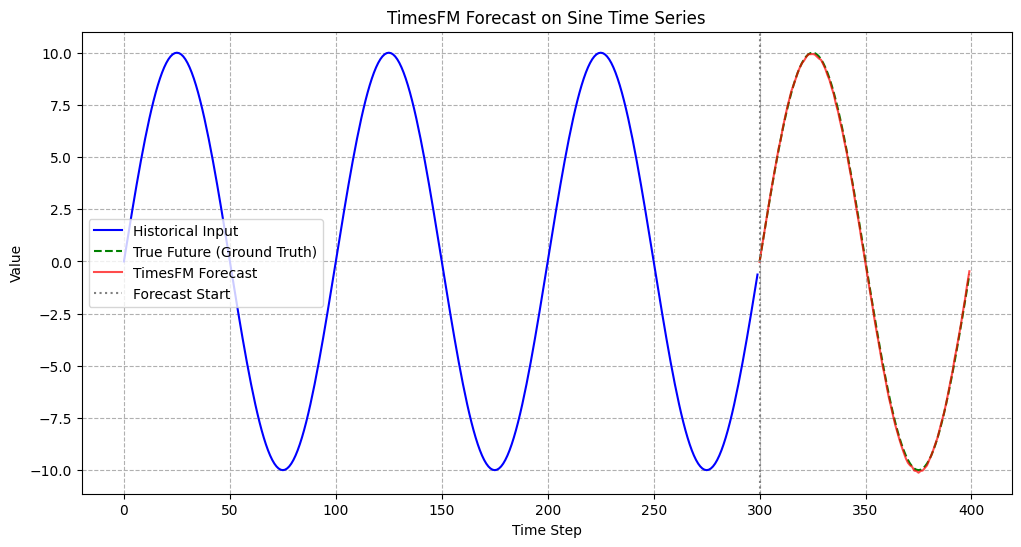

In [14]:
plt.figure(figsize=(12, 6))

# Plot Historical Data
plt.plot(range(context_len), historical_data, label='Historical Input', color='blue')

# Plot True Future
future_range = range(context_len, context_len + horizon_len)
plt.plot(future_range, true_future, label='True Future (Ground Truth)', color='green', linestyle='--')

# Plot Forecast
plt.plot(future_range, forecast_values, label='TimesFM Forecast', color='red', linestyle='-', alpha=0.7)

plt.axvline(x=context_len, color='gray', linestyle=':', label='Forecast Start')
plt.title('TimesFM Forecast on Sine Time Series')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()